In [2]:
%run prelude.py
%matplotlib inline

# Data Agregation Methods

## (1) Count

The way to aggregate data is to count the samples in the datasets.

In [3]:
def count(X):
    return len(X)

def count_below(X, y):
    return len([x for x in X if x < y])

def ratio_below(X, y):
    return count_below(X,y)/count(X)

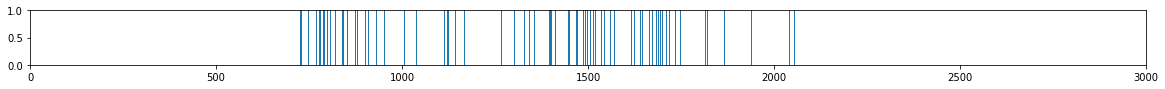

In [4]:
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plt.figure(figsize=(20,1))
plt.xlim(0,3000)
sns.rugplot(X,1);

In [5]:
print("Total count:", count(X))

Total count: 76


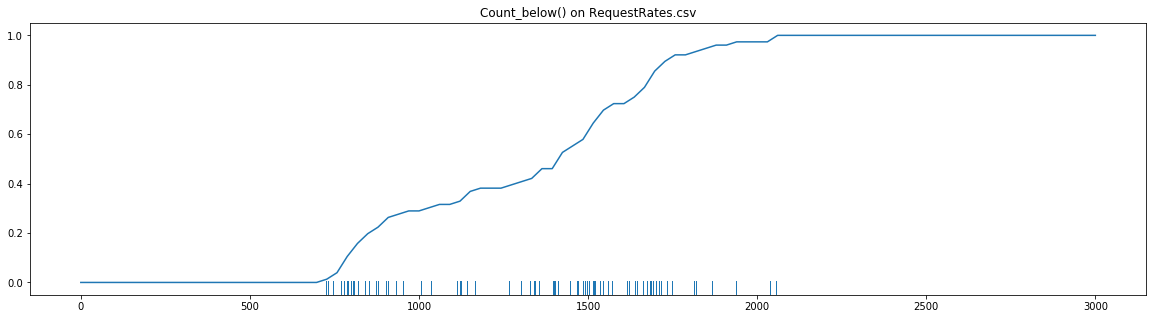

In [6]:
plt.figure(figsize=(20,5))
plt.title("Count_below() on RequestRates.csv")
grid = np.linspace(0,3000,100)
# plt.plot(grid, [count_below(X,y) for y in grid])
plt.plot(grid, [ratio_below(X,y) for y in grid])
sns.rugplot(X);

## Fancy Names

The function `ratio_below(X,y)` also has fancy names:

* Empirical Comulative Distribution Function (CDF)

* Inverse Percentile

## Properties

### Mergability

* Counts are mergable: `count(X + Y) == count(X) + count(Y)`
* count_below() / count_above() is also mergable: `count_below(X + Y, y) == count(X,y) + count(Y,y)`
* ratio_below() is not mergable (on the nose), you need to remember the total count.

### Robustness

* count(X) is not affected by outliers at all.
* count_below() is robust: `count_below(X,x)` changes by max +/-1 if an outlier is added to the dataset.
* ratio_below() is robust as well.

## Application:

- Count unhappy users: https://www.circonus.com/2016/06/percentages-arent-people/
  ![](../img/unhappy-users.png)
  Demo: https://demo.circonus.com/trending/graphs/view/5209437e-6fa9-4964-aa0b-2c59eb461cfa

- Banded Metrics (e.g. [VividCortex](https://www.slideshare.net/vividcortex/monitoring-with-percentiles)
  ![](../img/banded-metrics.png)

- Histogram Substitutes (e.g. [Prometheus](https://prometheus.io/docs/concepts/metric_types/#histogram))  
  Seems problematic: http://linuxczar.net/blog/2016/12/31/prometheus-histograms/


# (2) Mean Values

The _mean value_ of $X=[x_1, \dots, x_n]$ is defined as

$$ \mu = mean(X) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative

In [7]:
# Computation of the mean value

def mean(X):
    return float(sum(X)) / len(X)

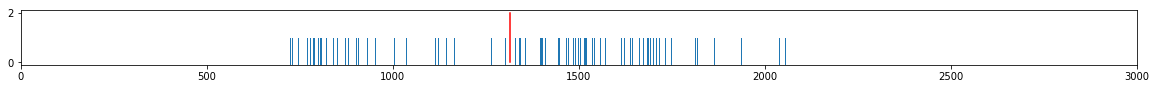

In [8]:
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plt.figure(figsize=(20,1))
plt.xlim(0,3000)
plt.plot([mean(X),mean(X)],[0,2],'r-')
sns.rugplot(X,height=.5)

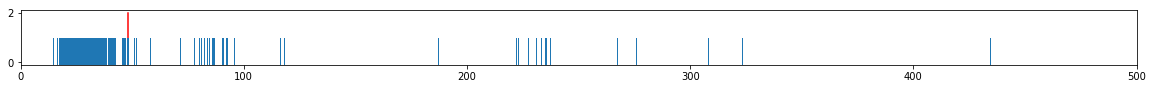

In [8]:
X = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plt.figure(figsize=(20,1))
plt.xlim(0,500)
plt.plot([mean(X),mean(X)],[0,2],'r-')
sns.rugplot(X,height=.5)

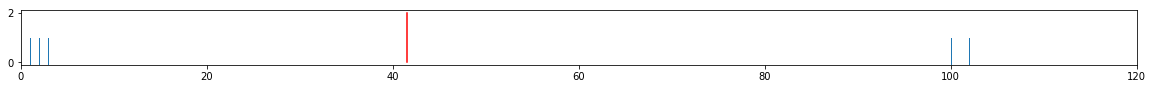

In [9]:
# Mean values can be atypical
X=[1,2,3,100,102]
plt.figure(figsize=(20,1))
plt.xlim(0,120)
plt.plot([mean(X),mean(X)],[0,2],'r-')
sns.rugplot(X,height=.5)

## Properties

* Mean values are not robust, a single outlier can skew the mean heavily.

* Mean values are mergable, if considered along with the count.


# Applications

* Main rollup aggregate used everywhere
* Used a lot for Graphing
* Caution with Spike Erosion: https://www.circonus.com/2016/01/spike-erosion/
*  "Because looking at your average response time is like measuring the average temperature of a hospital. What you really care about is a patient’s temperature, and in particular, the patients who need the most help." - Dogan Ugurlu - https://blog.optimizely.com/2013/12/11/why-cdn-balancing/


# (3) Median Vaules

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \lt m \} = \# \{ i \,|\, x_i \gt m \}. $$

So the number of samples smaller than $m$ is equal to the number of samples larger than $m$.
(Both should be roughly $n/2$).
  
Remark:

* A Median always exists
* Median is not always unique
* Less "precise" then the mean for well behaved datasets

# The central median

Medians can be computed by sorting the dataset.

`S = sorted(X)`

Consider the following cases:

- if `len(X)` is odd, then `S[(len(X)-1)/2]` is the (unique and) central median.
- if `len(X)` is even, then all values between `S[len(X)/2-1]` and `S[len(X)/2]` are median values.  
  The central median is defined as the mean of those two values.

We write $median(X)$ for the central median of $X$.

Example:
* `median([1,2,3]) = 2`
* `median([1,2]) = (1 + 2) / 2`

## Properties

* Median values are robust, a single outlier not affect a median much.

* Median values are not mergable.

In [9]:
# Computation of the median
def median_range(X):
    S = sorted(X)
    n = len(X)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (S[lower_mid], S[upper_mid])

def median(X):
    a,b = median_range(X)
    return (a+b)/2

In [10]:
def plot_median_range(X):
    plt.figure(figsize=(14,1))
    a, b = median_range(X)
    c = (a+b)/2.
    sns.rugplot(X, color="green", height=0.5)
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([c,c],[0.5,1],'r-')
    plt.plot([a,b],[0.5,0.5],'r--')
    plt.title("Median Range: {:.3f} .. {:,.3f}".format(a,b))
    plt.ylim([0,1])

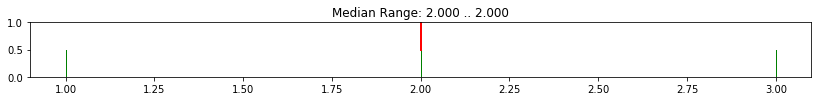

In [11]:
plot_median_range([1,2,3])

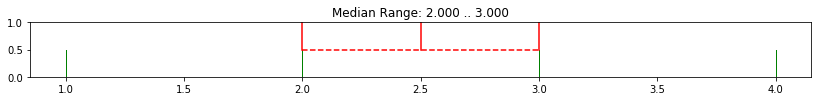

In [12]:
plot_median_range([1,2,3,4])

# Examples: Median

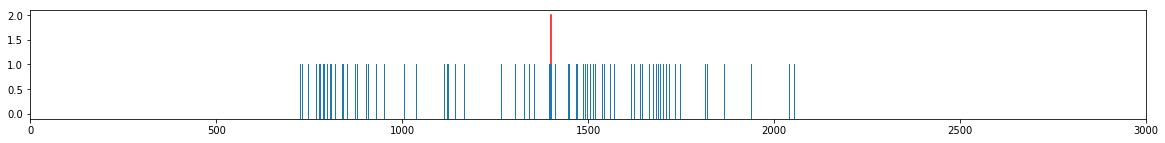

In [13]:
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plt.figure(figsize=(20,2))
plt.xlim(0,3000)
plt.plot([median(X),median(X)],[0,2],'r-')
sns.rugplot(X,height=.5)

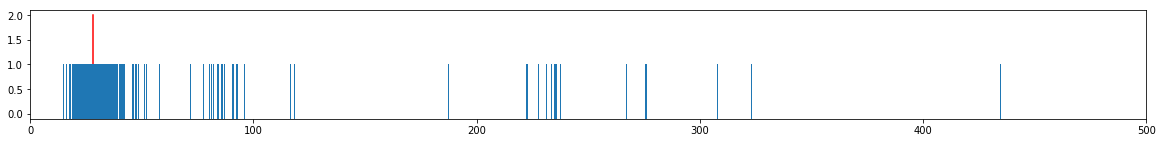

In [14]:
X = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plt.figure(figsize=(20,2))
plt.xlim(0,500)
plt.plot([median(X),median(X)],[0,2],'r-')
sns.rugplot(X,height=.5)

# Aside: Truncated Means

* Truncated means "interpolate" between means and medianse.
* In many cases they provid the increased "precision" of means, while keeping the robustnes against outliers.

To arrive at the k-truncated mean of a dataset X, perform the following steps:
* Remove a minimum and a maximum value from X, a total of k times.
* The remaining samples are called the k-truncation of X and denoted by $T_k X$.
* Caculate the mean value of the remaining samples.

We deonte the k-truncated mean by `tmean(X,k)`.

In [15]:
def tmean(X,k):
    X = list(X)
    k = int(k)
    if len(X) <= 2*k:
        return None
    for i in range(k):
        X.remove(max(X))
        X.remove(min(X))
    return mean(X)

In [16]:
# Truncated mean examples
print(tmean([1,2,3,5,100],0))
print(tmean([1,2,3,5,100],1))
print(tmean([1,2,3,5,100],2))

22.2
3.3333333333333335
3.0


In [17]:
# Plot
def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean_median(X, title):
    plt.figure(figsize=(14,1))
    plt.title(title)
    print("###  " + title + " ###")
    sns.rugplot(X, color='grey', height=0.5)
    mark(mean(X));                     print("mean:        {:4.2f} (red)".format(mean(X)))
    k = int(math.ceil(10*len(X)/100.))
    mark(tmean(X,k), style='b');       print("tmean(X,{:2}): {:4.2f} (blue)".format(k,tmean(X,k)))
    mark(median(X), style='g');        print("median:      {:4.2f} (green)".format(median(X)))
    plt.show()

# Comparison of Centrality Measures

###  Normal data ###
mean:        -0.02 (red)
tmean(X,50): -0.05 (blue)
median:      -0.09 (green)


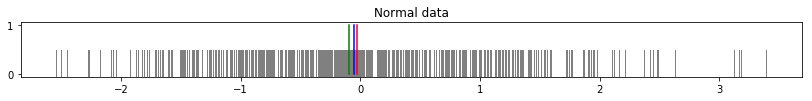

###  Request rates ###
mean:        1316.31 (red)
tmean(X, 8): 1315.61 (blue)
median:      1399.66 (green)


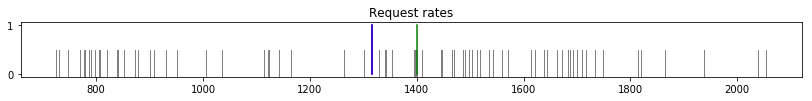

###  Web Latency ###
mean:        45.77 (red)
tmean(X,10): 30.52 (blue)
median:      29.10 (green)


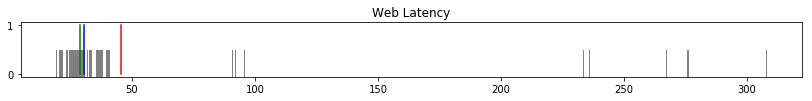

In [18]:
Z = [ np.random.normal() for x in range(500) ]
plot_mean_median(Z, "Normal data")

X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plot_mean_median(X, "Request rates")

Y = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plot_mean_median(Y[0:100], "Web Latency")

# (5) Percentiles

The definition is a little involved so cover examples first

* The minimum is a 0%-percentile
* A median is a 50%-percentile
* The maximum is a 100%-percentile
* Quartiles: $0,25,50,75,100$-percentiles
* Quantiles: The $r$-quantile is the $r \times 100$-percentile $0<r<1$.

# General Definition of Percentiles

Pick a number $0\leq p \leq 100$. A $p$%-percentile for $X$ is a value $y$ such that,

$$ \#\{i \,|\, X[i] \lt y \} \leq \frac{p}{100} \cdot n $$

and

$$ \#\{i \,|\, X[i] \gt y \} \leq \frac{100-p}{100} \cdot n $$

Roughly speaking, $y$ divides $X$ in $p\%$ samples that are lower than $y$ and $(100-p)\%$ samples that are larger than $y$.

Remarks:

* Percentiles always exists
* Non unique (like median)
* Lot's of ways to choose a quantile function, i.e. interpolate between $s_a$ and $s_b$ cf.  
  http://en.wikipedia.org/wiki/Quantile#Estimating_the_quantiles_of_a_population

In [19]:
# Computation of Quantiles
def percentile_range(p,X):
    q = p/100.0
    S = sorted(X)
    n = len(X)
    upper_d = int(math.ceil(q * (n + 1)))
    lower_d = int(math.floor(q * (n + 1)))
    # edge cases
    if upper_d == 0:   upper_d = 1
    if upper_d == n+1: upper_d = n
    if lower_d == 0:   lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1], S[upper_d-1])

def percentile(p,X):
    a,b = percentile_range(p,X)
    return (a+b)/2 # mid point percentile. One choice!

In [20]:
def mark_range(a,b):
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([a,b],[0.75,0.75],'r--')

def plot_percentile_range(p,X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile_range(p,X)
    mark_range(a,b)
    plt.title("{:n}%-Percentile Range: {:.3f} .. {:,.3f}".format(p, a,b))
    plt.ylim([0,1])

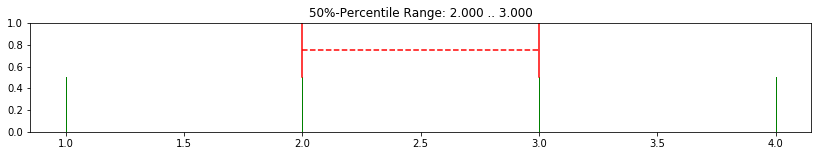

In [21]:
plot_percentile_range(50,[1,2,3,4])

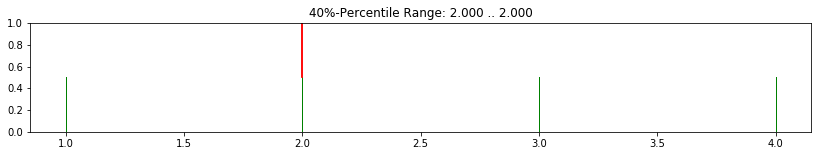

In [22]:
plot_percentile_range(40,[1,2,3,4])

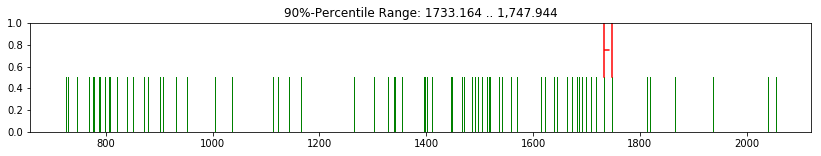

In [24]:
plot_percentile_range(90,X)

# Properties

* Percentiles are robust.
* Precentiles are not mergable (except: min/max)

# Applications

* Service Level Monitoring: p99, p95 ([Dynamo paper](https://www.allthingsdistributed.com/2007/10/amazons_dynamo.html))

* Deviation measures (cf. next section)

# Percentiles can't be Aggregated

* Blog: www.circonus.com/problem-math/

* Twitter: https://twitter.com/heinrichhartman/status/748562001392111617

* Reddit: https://www.reddit.com/r/devops/comments/941n2k/tsdbs_at_scale_part_one/e3po8d3/

# Summary:

| Statistic | Mergable | Robust |
|--|--|--|
| count | yes | yes |
| mean  | yes | no  |
| median | no | yes |
| truncated mean | no | yes |
| max/min | yes | no |
| percentile | no | yes |

It looks like you have to choose between robust and mergable statistics.